In [1]:
!pip install datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC,SVC

In [2]:
train_titanic_df = pd.read_csv("Dataset/train.csv")
test_titanic_df = pd.read_csv("Dataset/test.csv")
train_titanic_df = train_titanic_df.drop(['Ticket', 'Cabin','Name','PassengerId'], axis=1)
test_titanic_df = test_titanic_df.drop(['Ticket', 'Cabin','Name'], axis=1)

In [3]:
train_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
genders = {"male": 1, "female": 0}
ports = {"S": 0, "C": 1, "Q": 2}
train_titanic_df['Sex'] = train_titanic_df['Sex'].map(genders)
test_titanic_df['Sex'] = test_titanic_df['Sex'].map(genders)

train_titanic_df['Embarked'] = train_titanic_df['Embarked'].map(ports)

train_titanic_df['Embarked'] = test_titanic_df['Embarked'].map(ports)
train_titanic_df['Age'] = (train_titanic_df.groupby(['SibSp', 'Parch', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())))
train_titanic_df = train_titanic_df[['Survived','Pclass','Sex','Age','Parch','SibSp','Fare']]
test_titanic_df = test_titanic_df[['Pclass','Sex','Age','Parch','SibSp','Fare']]
train_titanic_df.dropna(inplace=True)
titanic_df = train_titanic_df
X=titanic_df.drop(['Survived'],axis=1)
y=titanic_df['Survived']

In [5]:
train_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    int64  
 3   Age       884 non-null    float64
 4   Parch     884 non-null    int64  
 5   SibSp     884 non-null    int64  
 6   Fare      884 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.2 KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Pclass'}>, <AxesSubplot:>]],
      dtype=object)

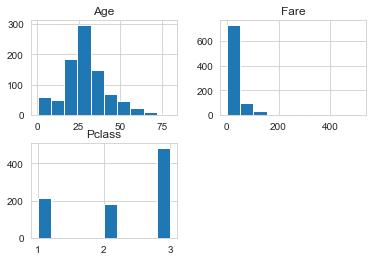

In [6]:
titanic_df.hist(['Age','Fare','Pclass'])

In [7]:
titanic_df[['Survived','Sex']].corr()

,Survived,Sex
Survived,1.000000,-0.548066
Sex,-0.548066,1.000000


In [8]:
print(titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Sex  Survived
0    0  0.749196
1    1  0.190227


Correlation Relation Between Survived and Sex:

-0.548066 - A moderate negative (downhill sloping) relationship
The correlation is clearly seen when the Sex (Male, Female) changes the survival chances changes because, When Sex is Female , there is a high chance of Survival and vice versa

Therefore, Sex is an Important Feature for the Survival chances


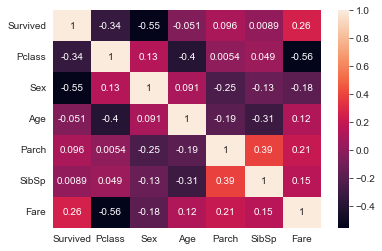

In [9]:
sns.heatmap(titanic_df.corr(), annot=True)
plt.show()

/Users/jay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


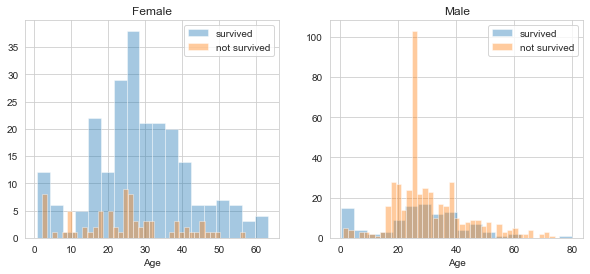

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_df[titanic_df['Sex']==0]
men = titanic_df[titanic_df['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.7737556561085973

In [13]:
glass_df = pd.read_csv("Dataset/glass.csv")


In [14]:
y=glass_df["Type"]
X=glass_df.drop(["Type"],axis=1)

In [15]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.46296296296296297

In [18]:
classification_report(y_test, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.32142857142857145,
  'recall': 0.6428571428571429,
  'f1-score': 0.4285714285714286,
  'support': 14},
 '2': {'precision': 0.45454545454545453,
  'recall': 0.20833333333333334,
  'f1-score': 0.28571428571428575,
  'support': 24},
 '3': {'precision': 0.5,
  'recall': 0.4,
  'f1-score': 0.4444444444444445,
  'support': 5},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 0.6666666666666666,
  'recall': 1.0,
  'f1-score': 0.8,
  'support': 2},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'accuracy': 0.46296296296296297,
 'macro avg': {'precision': 0.49044011544011545,
  'recall': 0.5418650793650793,
  'f1-score': 0.4931216931216931,
  'support': 54},
 'weighted avg': {'precision': 0.4859708193041526,
  'recall': 0.46296296296296297,
  'f1-score': 0.438506760728983,
  'support': 54}}

In [19]:
svc = SVC(max_iter=500000)
y_pred = svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.25925925925925924

In [20]:
classification_report(y_test, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.25925925925925924,
  'recall': 1.0,
  'f1-score': 0.4117647058823529,
  'support': 14},
 '2': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 24},
 '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 '5': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '7': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7},
 'accuracy': 0.25925925925925924,
 'macro avg': {'precision': 0.8765432098765432,
  'recall': 0.16666666666666666,
  'f1-score': 0.06862745098039215,
  'support': 54},
 'weighted avg': {'precision': 0.8079561042524006,
  'recall': 0.25925925925925924,
  'f1-score': 0.10675381263616558,
  'support': 54}}

In [21]:
linear_svc = LinearSVC(max_iter=500000)
y_pred = linear_svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.5925925925925926

In [22]:
classification_report(y_test, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.48,
  'recall': 0.8571428571428571,
  'f1-score': 0.6153846153846153,
  'support': 14},
 '2': {'precision': 0.631578947368421,
  'recall': 0.5,
  'f1-score': 0.5581395348837209,
  'support': 24},
 '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'accuracy': 0.5925925925925926,
 'macro avg': {'precision': 0.6019298245614034,
  'recall': 0.4761904761904762,
  'f1-score': 0.445587358378056,
  'support': 54},
 'weighted avg': {'precision': 0.6458869395711502,
  'recall': 0.5925925925925926,
  'f1-score': 0.5557543231961837,
  'support': 54}}

In [23]:
glass_df.corr().style.background_gradient(cmap="Blues")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:ylabel='Count'>

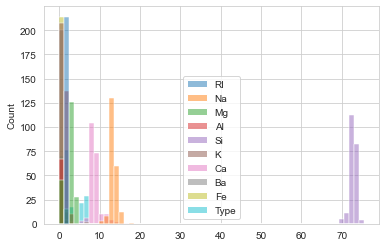

In [24]:
sns.histplot(glass_df)

On Glass Dataset:

Linear SVC has the better Accuracy than SVC and Naïve Bayes method

SVMs are different from other Naive Bayes algorithm because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes. The decision boundary created by SVMs is called the maximum margin classifier or the maximum margin hyper plane.